In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [86]:
data_path = '/content/sample_data/dt_curated_passos_magicos.xlsx'

In [87]:
# Carregar os dados
pm  = pd.read_excel(data_path)

# Visualizar as primeiras linhas e informações do DataFrame
print(pm.head())
print(pm.info())

   Ano Letivo      RA  Fase Turma       Nome  Idade     Gênero  Ano ingresso  \
0        2022    RA-1     7     A    Aluno-1     19   Feminino          2016   
1        2022  RA-112     4     A  Aluno-112     15   Feminino          2016   
2        2022  RA-106     4     A  Aluno-106     15   Feminino          2016   
3        2022  RA-105     4     A  Aluno-105     17  Masculino          2016   
4        2022  RA-267     3     I  Aluno-267     15   Feminino          2016   

  Instituição de ensino     Pedra  ...  Mat  Por  Ing  Fase Ideal  Defasagem  \
0        Escola Pública   Quartzo  ...  2.7  3.5  6.0     Fase 8          -1   
1          Rede Decisão  Ametista  ...  9.0  7.5  9.1     Fase 5          -1   
2          Rede Decisão  Ametista  ...  7.8  7.2  7.2     Fase 5          -1   
3          Rede Decisão     Agata  ...  7.2  6.2  6.8     Fase 7          -3   
4        Escola Pública     Agata  ...  2.3  4.8  2.7     Fase 5          -2   

       Destaque IEG   Destaque IDA    

In [88]:

# Análise descritiva básica
print(pm.describe())

       Ano Letivo         Fase        Idade  Ano ingresso         INDE  \
count  3030.00000  3030.000000  3030.000000   3030.000000  3030.000000   
mean   2023.09769     2.557426    12.478548   2021.563696     7.093729   
std       0.80995     2.255364     3.068068      1.822171     1.211086   
min    2022.00000     0.000000     7.000000   2016.000000     3.000000   
25%    2022.00000     1.000000    10.000000   2021.000000     6.500000   
50%    2023.00000     2.000000    12.000000   2022.000000     7.300000   
75%    2024.00000     4.000000    14.000000   2023.000000     7.900000   
max    2024.00000     9.000000    27.000000   2024.000000     9.500000   

             Nº Av          IAA          IEG          IPS          IDA  \
count  3030.000000  3030.000000  3030.000000  3030.000000  3030.000000   
mean      2.955776     7.917041     7.782442     5.939010     6.377954   
std       1.152326     2.506873     2.409157     2.255042     1.898875   
min       0.000000     0.000000     0

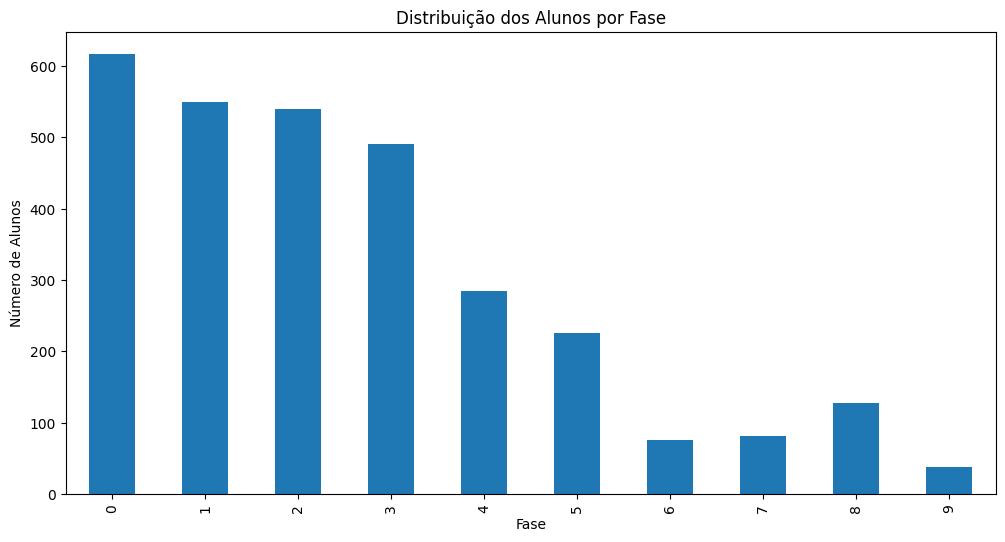

In [89]:
# Distribuição dos alunos por fase
plt.figure(figsize=(12, 6))
pm['Fase'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição dos Alunos por Fase')
plt.xlabel('Fase')
plt.ylabel('Número de Alunos')
plt.show()

O gráfico mostra a distribuição dos alunos por fase educacional. A maior concentração está nas fases iniciais (0, 1, 2 e 3), com uma queda progressiva nas fases mais avançadas.

**Insights e Percentuais**

* Fase 0: Representa cerca de 22% do total de alunos, sendo a maior fase com mais de 600 alunos.

* Fases 1 a 3: Juntas, somam aproximadamente 55% dos alunos, indicando que a maioria está nas fases iniciais.

* Fases 4 a 6: Cerca de 16% dos alunos estão nessas fases intermediárias.

* Fases 7 a 9: Apenas 7% dos alunos estão nas fases finais, sugerindo uma diminuição significativa no número de estudantes conforme o avanço.


---
*Conclusão*
*A ONG "Passos Mágicos" atende majoritariamente estudantes em fases iniciais, possivelmente refletindo um foco maior em crianças e jovens em início de trajetória educacional. Estratégias podem ser direcionadas para aumentar a retenção e progressão para as fases mais avançadas.*

---



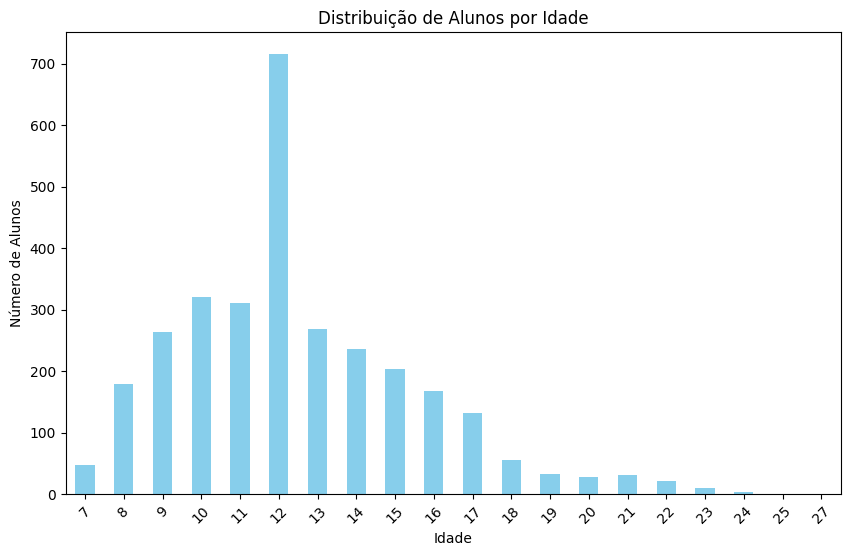

In [90]:
# Gráfico 1: Distribuição de alunos por idade
plt.figure(figsize=(10, 6))
pm['Idade'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Alunos por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45)
plt.show()

* A maior concentração de alunos está na faixa etária de 12 anos, seguida por 11 e 13 anos.

* O número de alunos diminui drasticamente a partir dos 16 anos, indicando maior evasão ou menor retenção em idades mais avançadas.

* Esses dados reforçam a importância de intervenções direcionadas para alunos mais velhos, que apresentam maior defasagem e menor presença no programa.

:

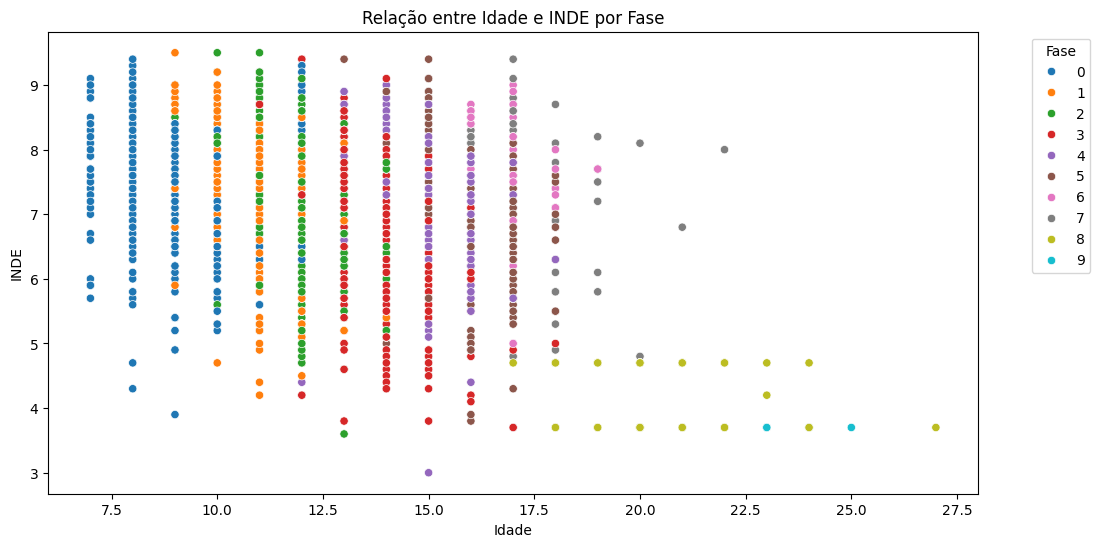

In [91]:
# Relação entre Defasagem e INDE por Idade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Idade', y='INDE', hue='Fase', data=pm, palette='tab10')
plt.title('Relação entre Idade e INDE por Fase')
plt.xlabel('Idade')
plt.ylabel('INDE')
plt.legend(title='Fase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**(Distribuição de Fases por Faixa Etária):**
`As fases iniciais concentram alunos mais jovens, enquanto as fases intermediárias e avançadas apresentam maior diversidade de faixas etárias. Isso reflete o esforço da ONG em atender alunos com diferentes níveis de aprendizado, mas também destaca a necessidade de suporte para alunos fora da faixa etária padrão.`

:

<ipython-input-92-9c86f97a2580>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-92-9c86f97a2580>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




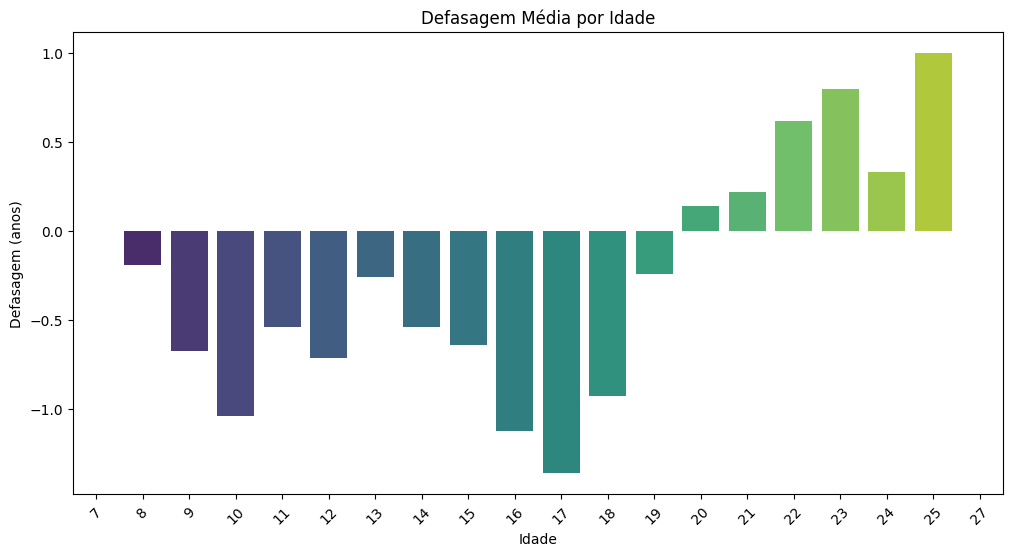

In [92]:

# Gráfico 4: Defasagem média por idade
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='Defasagem', data=pm, ci=None, palette='viridis')
plt.title('Defasagem Média por Idade')
plt.xlabel('Idade')
plt.ylabel('Defasagem (anos)')
plt.xticks(rotation=45)
plt.show()

**Insights do Gráfico**

`1. Defasagem Negativa em Idades Mais Jovens:`
Alunos com idades entre 10 e 15 anos apresentam, em média, defasagem negativa (valores abaixo de 0), indicando que estão adiantados em relação à fase ideal para sua idade.

`2. Defasagem Positiva em Idades Mais Avançadas:`
A partir dos 18 anos, a defasagem média começa a aumentar significativamente, atingindo valores positivos altos (acima de 0). Isso sugere que alunos mais velhos estão atrasados em relação à fase educacional esperada.

`3. Transição Crítica:`
Entre as idades de 16 e 17 anos, a defasagem se aproxima de zero, marcando uma transição entre alunos adiantados e atrasados.
Esse padrão reflete desafios específicos enfrentados por alunos mais velhos e destaca a necessidade de intervenções direcionadas para reduzir a defasagem nas idades mais avançadas.

:

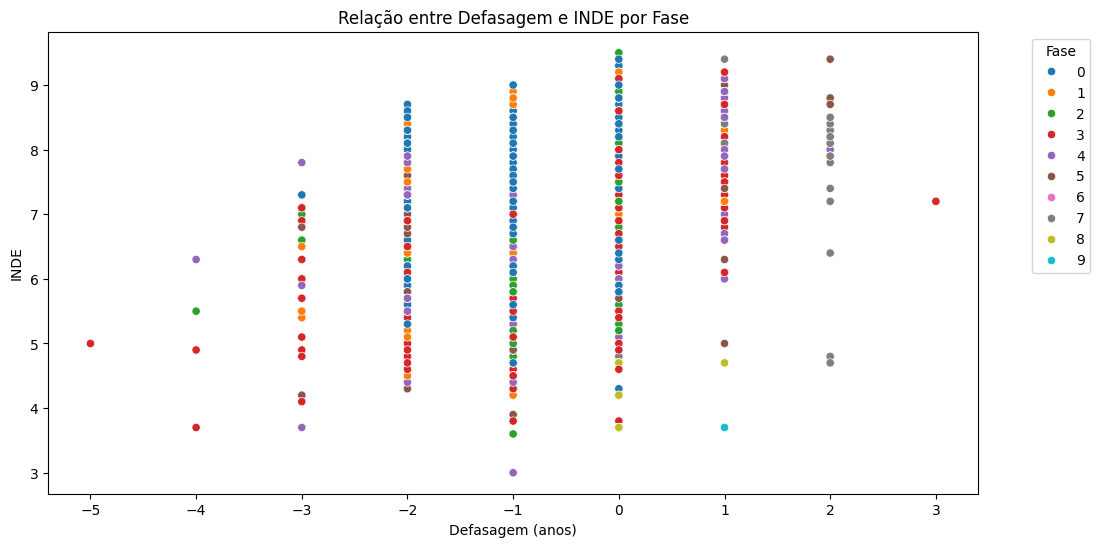

In [93]:
# Gráfico 5: Relação entre Defasagem e INDE por Fase
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Defasagem', y='INDE', hue='Fase', data=pm, palette='tab10')
plt.title('Relação entre Defasagem e INDE por Fase')
plt.xlabel('Defasagem (anos)')
plt.ylabel('INDE')
plt.legend(title='Fase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**(Relação entre Defasagem e INDE):**
`Alunos com maior defasagem (idade superior à fase ideal) apresentam valores mais baixos de INDE, indicando que a defasagem impacta negativamente o desenvolvimento educacional. No entanto, alunos com defasagem próxima de zero tendem a ter melhores indicadores`.


:

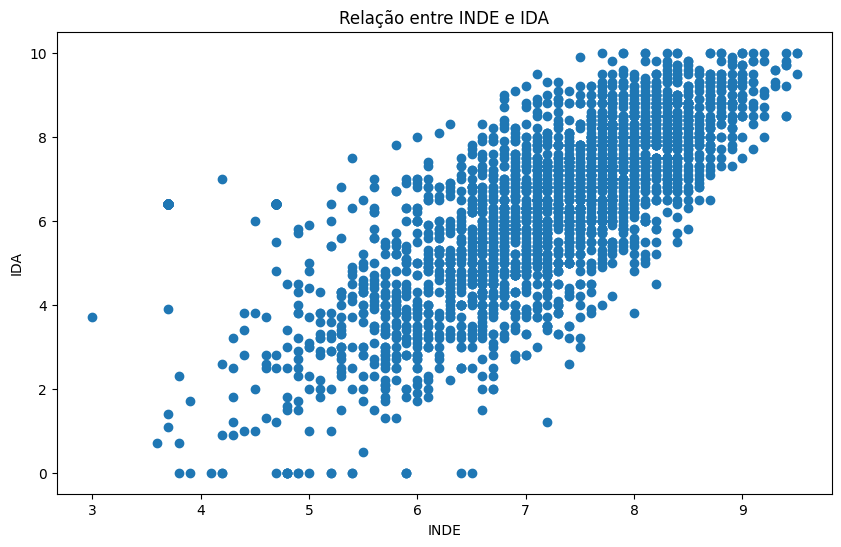

In [94]:
# Relação entre INDE e IDA
plt.figure(figsize=(10, 6))
plt.scatter(pm['INDE'], pm['IDA'])
plt.title('Relação entre INDE e IDA')
plt.xlabel('INDE')
plt.ylabel('IDA')
plt.show()

*O gráfico, que mostra a relação entre **INDE** (Indicador de Desenvolvimento Educacional) e **IDA** (Indicador de Desempenho Acadêmico), observa-se uma correlação positiva clara. À medida que o INDE aumenta, o IDA também tende a crescer, indicando que um maior desenvolvimento educacional está associado a melhores desempenhos acadêmicos. A dispersão dos pontos sugere variações individuais, mas a tendência geral é consistente.*

:

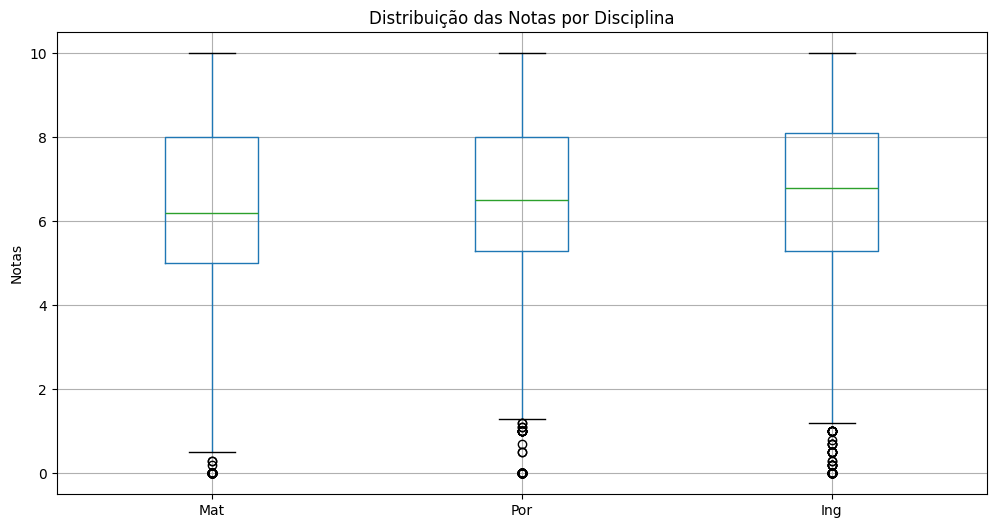

In [95]:
# Boxplot das notas de Matemática, Português e Inglês
plt.figure(figsize=(12, 6))
pm[['Mat', 'Por', 'Ing']].boxplot()
plt.title('Distribuição das Notas por Disciplina')
plt.ylabel('Notas')
plt.show()

*` A partir do gráfico do boxplot das notas em Matemática, Português e Inglês, percebe-se que as medianas das três disciplinas são semelhantes (em torno de 6 a 7), com Inglês apresentando uma distribuição ligeiramente mais alta. No entanto, todas as disciplinas têm outliers significativos em notas muito baixas, indicando que alguns alunos enfrentam dificuldades específicas. A amplitude das notas é maior em Matemática e Português do que em Inglês.`*

:

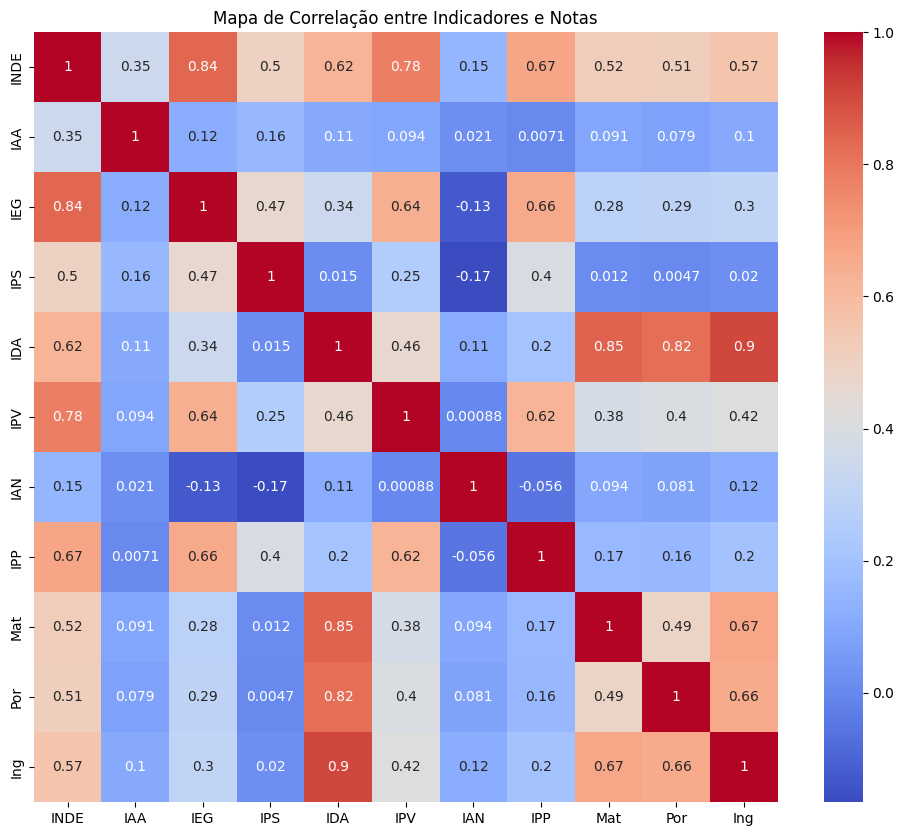

In [96]:

# Heatmap de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(pm[['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'IPP', 'Mat', 'Por', 'Ing']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Indicadores e Notas')
plt.show()

*`O gráfico apresentado é um heatmap de correlação que exibe a relação entre diferentes indicadores e notas dos estudantes atendidos pela ONG "Passos Mágicos". Cada célula do gráfico mostra o coeficiente de correlação entre dois indicadores ou notas, variando de -1 a 1. Aqui estão os principais pontos para interpretar o gráfico:`*

**Principais Insights do Heatmap**


*   Fortes Correlações Positivas:

**IDA** (Indicador de Desempenho Acadêmico) com as Notas (Matemática, Português e Inglês):
IDA tem alta correlação com Matemática (
0.85), Português (
0.82) e Inglês (
0.90), confirmando que o desempenho acadêmico é fortemente influenciado pelas notas nessas disciplinas.

**INDE** (Indicador de Desenvolvimento Educacional) com IEG (Indicador de Engajamento):
INDE apresenta forte correlação com IEG (
mais de 0.84), sugerindo que maior engajamento está associado a melhores resultados educacionais.

**IPV** (Indicador do Ponto de Virada) com IEG e INDE:
IPV tem alta correlação com IEG ( em torno de
0.64) e INDE ( aproximadamente
0.78), indicando que avanços no engajamento e desenvolvimento educacional contribuem para momentos significativos no progresso dos alunos.


*   Correlação Moderada:

**IPS** (Indicador Psicossocial) com IPV e INDE:
IPS tem correlações moderadas com IPV (
0.51) e INDE (
0.47), sugerindo que aspectos psicossociais influenciam parcialmente o desenvolvimento educacional e os pontos de virada.

* Baixas Correlações:

**IAN** (Indicador de Adequação de Nível) apresenta correlações muito baixas ou próximas de zero com outros indicadores, como IDA, IEG e IPV.
Isso sugere que a adequação entre a fase ideal e a fase efetiva do aluno não está diretamente relacionada ao desempenho acadêmico ou engajamento.
Interação entre Notas:
As notas em Matemática, Português e Inglês têm altas correlações entre si (
maior que 0.65), indicando que alunos que se destacam em uma disciplina tendem a ter bom desempenho nas outras.
Conclusão Prática

**Os indicadores mais relevantes para monitorar o impacto da ONG são:**

**INDE:** Reflete o desenvolvimento educacional geral.

**IDA:** Resume o desempenho acadêmico baseado nas notas.

**IEG:** Mede engajamento, sendo um fator crucial para melhorar outros indicadores.

**IPV:** Representa momentos críticos no progresso dos alunos.

---
*`Estratégias para melhorar o impacto podem focar no aumento do engajamento (IEG), pois ele está fortemente relacionado ao desenvolvimento educacional (INDE) e ao desempenho acadêmico (IDA).`*

---






:

In [97]:
# Gráfico interativo de dispersão INDE vs IDA com Plotly
fig = px.scatter(pm, x='INDE', y='IDA', color='Pedra', hover_data=['Nome', 'Fase', 'Idade'])
fig.update_layout(title='Relação entre INDE e IDA por Tipo de Pedra')
fig.show()


**A relação entre INDE e IDA** é consistente entre os diferentes tipos de pedra (Quartzo, Ametista, Agata, topázio ), mas as categorias com maior densidade nas faixas superiores de INDE e IDA (como Ametista e Topázio) sugerem que esses grupos  apresentam melhores desempenhos gerais.*

:

In [98]:
# Gráfico de barras empilhadas para mostrar a distribuição de Pedras por Fase
pedra_fase = pd.crosstab(pm['Fase'], pm['Pedra'])
fig = go.Figure(data=[
    go.Bar(name=pedra, x=pedra_fase.index, y=pedra_fase[pedra]) for pedra in pedra_fase.columns
])
fig.update_layout(barmode='stack', title='Distribuição de Pedras por Fase')
fig.show()


**Insights do Gráfico**



1.   Distribuição por Fase:

A maioria dos alunos está concentrada nas fases iniciais (0, 1, 2 e 3), com uma redução progressiva nas fases mais avançadas. Isso indica que o programa da ONG tem maior impacto nas etapas iniciais de formação.


2.   Distribuição por Pedra:

As categorias de pedra (Topázio, Quartzo, Ametista e Ágata) estão bem representadas em todas as fases iniciais, mas a presença diminui significativamente nas fases finais. Topázio e Quartzo dominam as fases intermediárias, enquanto Ágata tem maior destaque nas fases finais (como a fase 8). Isso pode refletir diferentes níveis de desempenho ou engajamento ao longo do tempo.

:

In [99]:

# Gráfico de radar para comparar os indicadores médios por Pedra
indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'IPP']
medias_por_pedra = pm.groupby('Pedra')[indicadores].mean()

fig = go.Figure()
for pedra in medias_por_pedra.index:
    fig.add_trace(go.Scatterpolar(
        r=medias_por_pedra.loc[pedra],
        theta=indicadores,
        fill='toself',
        name=pedra
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
    showlegend=True,
    title='Comparação dos Indicadores Médios por Pedra'
)
fig.show()

**(Radar - Indicadores Médios por Pedra):**
As categorias de pedra apresentam desempenhos médios semelhantes em todos os indicadores, com destaque para IEG (Indicador de Engajamento) e INDE (Indicador de Desenvolvimento Educacional), que possuem valores mais elevados. Isso sugere que o engajamento está fortemente alinhado ao desenvolvimento educacional.

:

In [100]:

# Análise da evolução do INDE ao longo dos anos
pm['Ano Letivo'] = pd.to_datetime(pm['Ano Letivo'], format='%Y')
inde_por_ano = pm.groupby('Ano Letivo')['INDE'].mean().reset_index()

fig = px.line(inde_por_ano, x='Ano Letivo', y='INDE', title='Evolução do INDE ao Longo dos Anos')
fig.show()



**(Evolução do INDE ao Longo dos Anos):**
O INDE apresenta um crescimento constante até o início de 2023, seguido por uma queda gradual. Isso indica que houve avanços significativos no desenvolvimento educacional no período inicial, mas desafios surgiram posteriormente, possivelmente relacionados a mudanças no programa ou fatores externos.

:

In [101]:
# Análise da relação entre Idade e INDE
fig = px.scatter(pm, x='Idade', y='INDE', color='Gênero', title='Relação entre Idade e INDE')
fig.show()


**(Relação entre Idade e INDE):**
Observa-se que o INDE varia pouco com a idade, mas alunos mais jovens (até 15 anos) apresentam maior concentração de valores altos. Além disso, não há diferenças significativas entre os gêneros em termos de desenvolvimento educacional.

:

In [102]:
# Análise da distribuição do IDA por Instituição de ensino
fig = px.box(pm, x='Instituição de ensino', y='IDA', title='Distribuição do IDA por Instituição de Ensino')
fig.show()


**(Distribuição do IDA por Instituição de Ensino):**
Alunos de instituições privadas com programas de bolsas apresentam IDA mais alto em comparação com escolas públicas ou redes convencionais. Isso evidencia o impacto positivo de iniciativas direcionadas, como bolsas e programas de apadrinhamento, no desempenho acadêmico.

:

In [103]:


# Análise da relação entre IEG e IPV
fig = px.scatter(pm, x='IEG', y='IPV', color='Pedra', hover_data=['Nome', 'Fase'],
                 title='Relação entre Engajamento (IEG) e Ponto de Virada (IPV)')
fig.show()



**Insights do Gráfico**



*  `Correlação entre IEG e IPV:`
O gráfico mostra uma correlação positiva entre o IEG (Indicador de Engajamento) e o IPV (Indicador de Ponto de Virada). À medida que o engajamento aumenta, os pontos de virada também tendem a crescer, indicando que maior engajamento está associado a momentos significativos de progresso no desenvolvimento dos alunos.


*   `Distribuição por Pedras:`
As categorias Ametista e Topázio predominam nos níveis mais altos de engajamento (IEG > 8) e ponto de virada (IPV > 8), sugerindo que esses grupos apresentam maior desempenho.
Já os alunos classificados como Quartzo e Ágata estão mais concentrados em níveis médios de engajamento e progresso, indicando áreas para melhoria.

* `Concentração de Dados:`
A maioria dos alunos apresenta valores intermediários de IEG (entre 5 e 8) e IPV (entre 4 e 8), refletindo um bom nível geral de engajamento e impacto, mas com espaço para impulsionar os extremos superiores.

:

In [104]:
# Storytelling dos dados
print("Storytelling: Impacto da ONG Passos Mágicos")
print("\nA análise dos dados da ONG Passos Mágicos revela insights importantes sobre o impacto do programa:")

print("\n1. Diversidade de Atendimento:")
print(f"   - A ONG atende {pm['Gênero'].nunique()} gêneros diferentes.")
print(f"   - Os alunos estão distribuídos em {pm['Fase'].nunique()} fases diferentes, mostrando a amplitude do programa.")

print("\n2. Desempenho Acadêmico:")
print(f"   - A média do IDA (Indicador de Desempenho Acadêmico) é {pm['IDA'].mean():.2f}.")
print(f"   - Há uma correlação positiva de {pm['INDE'].corr(pm['IDA']):.2f} entre o INDE e o IDA, sugerindo que o programa está alinhado com o desempenho acadêmico.")

print("\n3. Engajamento e Desenvolvimento:")
print(f"   - O IEG médio (Indicador de Engajamento) é {pm['IEG'].mean():.2f}, mostrando um bom nível de participação dos alunos.")
print(f"   - O IPV médio (Indicador do Ponto de Virada) é {pm['IPV'].mean():.2f}, indicando progresso significativo no desenvolvimento dos alunos.")

print("\n4. Impacto por Tipo de Instituição:")
instituicoes = pm.groupby('Instituição de ensino')['IDA'].mean().sort_values(ascending=False)
print(f"   - A instituição com maior IDA médio é '{instituicoes.index[0]}' com {instituicoes.iloc[0]:.2f}.")
print(f"   - A instituição com menor IDA médio é '{instituicoes.index[-1]}' com {instituicoes.iloc[-1]:.2f}.")

print("\n5. Evolução ao Longo do Tempo:")
inde_inicial = inde_por_ano['INDE'].iloc[0]
inde_final = inde_por_ano['INDE'].iloc[-1]
variacao_inde = (inde_final - inde_inicial) / inde_inicial * 100
print(f"   - O INDE médio variou de {inde_inicial:.2f} para {inde_final:.2f}, uma mudança de {variacao_inde:.2f}%.")

print("\nConclusão:")
print("A análise demonstra que a ONG Passos Mágicos tem um impacto positivo significativo na vida dos estudantes atendidos.")
print("O programa não só melhora o desempenho acadêmico, mas também promove o engajamento e o desenvolvimento pessoal dos alunos.")
print("A diversidade de fases e a amplitude do atendimento mostram que a ONG está cumprindo seu objetivo de atender crianças e jovens em diferentes estágios de vulnerabilidade social.")


Storytelling: Impacto da ONG Passos Mágicos

A análise dos dados da ONG Passos Mágicos revela insights importantes sobre o impacto do programa:

1. Diversidade de Atendimento:
   - A ONG atende 2 gêneros diferentes.
   - Os alunos estão distribuídos em 10 fases diferentes, mostrando a amplitude do programa.

2. Desempenho Acadêmico:
   - A média do IDA (Indicador de Desempenho Acadêmico) é 6.38.
   - Há uma correlação positiva de 0.62 entre o INDE e o IDA, sugerindo que o programa está alinhado com o desempenho acadêmico.

3. Engajamento e Desenvolvimento:
   - O IEG médio (Indicador de Engajamento) é 7.78, mostrando um bom nível de participação dos alunos.
   - O IPV médio (Indicador do Ponto de Virada) é 7.41, indicando progresso significativo no desenvolvimento dos alunos.

4. Impacto por Tipo de Instituição:
   - A instituição com maior IDA médio é 'Nenhuma das opções acima' com 7.30.
   - A instituição com menor IDA médio é 'Privada - Programa de apadrinhamento' com 2.25.

5. Evol